In [21]:
import sys
import os
import importlib

# Ajout du chemin une fois
sys.path.append(os.path.abspath('../../python_files'))

# Liste des noms des modules à importer et recharger
module_names = [
    'preprocessing',
    'imports',
    'files',
    'clustering',
    'profile_prediction',
    'prediction_24h'
]

# Import et reload automatique
modules = {}
for name in module_names:
    modules[name] = importlib.import_module(name)
    importlib.reload(modules[name])

# Importer tout en global namespace (équivalent à from ... import *)
for name in module_names:
    exec(f'from {name} import *')



In [22]:
Simulation_Dataset = {
    "2018": "../../data/simulated_data_7years/Mal_isole/2018/Simulation_Outputs",
    "2019": "../../data/simulated_data_7years/Mal_isole/2019/Simulation_Outputs",
    "2020": "../../data/simulated_data_7years/Mal_isole/2020/Simulation_Outputs",
    "2021": "../../data/simulated_data_7years/Mal_isole/2021/Simulation_Outputs",
    "2022": "../../data/simulated_data_7years/Mal_isole/2022/Simulation_Outputs",
    "2023": "../../data/simulated_data_7years/Mal_isole/2023/Simulation_Outputs",
    "2024": "../../data/simulated_data_7years/Mal_isole/2024/Simulation_Outputs"   
}

Weather_Dataset = {
    "2018": "../../data/simulated_data_7years/Mal_isole/2018/Weather_Dataset.txt",
    "2019": "../../data/simulated_data_7years/Mal_isole/2019/Weather_Dataset.txt",
    "2020": "../../data/simulated_data_7years/Mal_isole/2020/Weather_Dataset.txt",
    "2021": "../../data/simulated_data_7years/Mal_isole/2021/Weather_Dataset.txt",
    "2022": "../../data/simulated_data_7years/Mal_isole/2022/Weather_Dataset.txt",
    "2023": "../../data/simulated_data_7years/Mal_isole/2023/Weather_Dataset.txt",
    "2024": "../../data/simulated_data_7years/Mal_isole/2024/Weather_Dataset.txt"   
}


In [60]:

# Exemple d'utilisation
city_groups = {
    "Weather_Dataset": Weather_Dataset
}

prefix_column_map = {
    "Text_": 1,
    "Hum_": 3,
    "Wind_": 4,
    "Solar_": 5,
    "Rayon_":7,
    "Ground_": 10
}

combined_data = extract_and_combine_all(city_groups, prefix_column_map)

city_groups = {
    "Simulation_Dataset":Simulation_Dataset  
}

prefix_column_map = {
    "Tint_": 2, 
    "conso_":4  
}

combined_Tint = extract_and_combine_all(city_groups, prefix_column_map)

Text_combined = combined_data.get('Text_combined_Weather_Dataset')
rayon_combined = combined_data.get('Rayon_combined_Weather_Dataset')
Hum_combined = combined_data.get('Hum_combined_Weather_Dataset')
Wind_combined = combined_data.get('Wind_combined_Weather_Dataset')
Solar_combined = combined_data.get('Solar_combined_Weather_Dataset')
Ground_combined = combined_data.get('Ground_combined_Weather_Dataset')
Tint_combined = combined_Tint.get('Tint_combined_Simulation_Dataset')
conso_combined = combined_Tint.get('conso_combined_Simulation_Dataset')


In [24]:
occupation=pd.read_csv("../../data/simulated_data_7years/Mal_isole/Occup_Schedule_Youssef.txt")
occ_df = pd.DataFrame(occupation["Occupancy"].values[:8760].reshape(-1, 24))
occupation_7years = pd.concat([occ_df] * 7, ignore_index=True)

In [25]:
clustering_heat = pd.read_csv("../../data/simulated_data_7years/result_data/clustering_heat_7years_data.csv")
conso=clustering_heat.drop(columns=["heat_on","clusters_1"])

In [63]:
conso_ouvert_flat = pd.DataFrame(conso_combined.values.flatten(), columns=["valeur"])
Text_combined_ouvert_flat = pd.DataFrame(Text_combined.values.flatten(), columns=["valeur"])


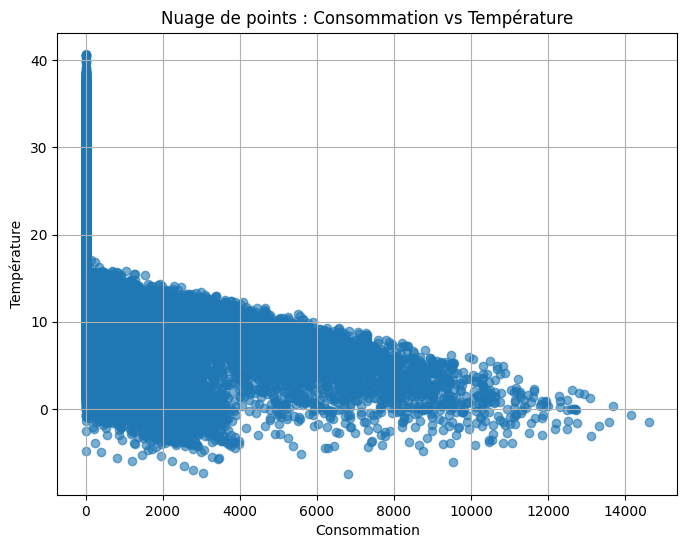

In [65]:
plt.figure(figsize=(8, 6))
plt.scatter(conso_ouvert_flat["valeur"], Text_combined_ouvert_flat["valeur"], alpha=0.6)
plt.xlabel("Consommation")
plt.ylabel("Température")
plt.title("Nuage de points : Consommation vs Température")
plt.grid(True)
plt.show()

In [29]:
clustering_heat = pd.read_csv("../../data/simulated_data_7years/result_data/clustering_heat_7years_data_from_1_novembre_to_31_avril.csv")
conso=clustering_heat.drop(columns=["heat_on","clusters_1"])

In [30]:
start_date = "2018-01-01"
dates = pd.date_range(start=start_date, periods=len(conso_combined), freq="D") 
Text_combined.insert(0, "Date", dates)
Ground_combined.insert(0, "Date", dates)
Solar_combined.insert(0, "Date", dates)
rayon_combined.insert(0, "Date", dates)
Wind_combined.insert(0, "Date", dates)
Hum_combined.insert(0, "Date", dates)
Tint_combined.insert(0, "Date", dates)
occupation_7years.insert(0, "Date", dates)



In [31]:

add_heating_season(occupation_7years)
add_heating_season(Tint_combined)
add_heating_season(Hum_combined)
add_heating_season(Text_combined)
add_heating_season(Wind_combined)
add_heating_season(rayon_combined)
add_heating_season(Solar_combined)
add_heating_season(Ground_combined)


df_occ = occupation_7years[occupation_7years["heat"] == 1].copy().reset_index(drop=True)
df_Text = Text_combined[Text_combined["heat"] == 1].copy().reset_index(drop=True)
df_Hum = Hum_combined[Hum_combined["heat"] == 1].copy().reset_index(drop=True)
df_Tint = Tint_combined[Tint_combined["heat"] == 1].copy().reset_index(drop=True)
df_Wind = Wind_combined[Wind_combined["heat"] == 1].copy().reset_index(drop=True)
df_ray = rayon_combined[rayon_combined["heat"] == 1].copy().reset_index(drop=True)
df_Solar = Solar_combined[Solar_combined["heat"] == 1].copy().reset_index(drop=True)
df_Ground = Ground_combined[Ground_combined["heat"] == 1].copy().reset_index(drop=True)



In [32]:
Text_combined_ouvert_flat2 = pd.DataFrame(df_Text.drop(columns=['Date', 'heat']).values.flatten(), columns=["valeur"])
Hum_combined_ouvert_flat2 = pd.DataFrame(df_Hum.drop(columns=['Date', 'heat']).values.flatten(), columns=["valeur"])
Tint_combined_ouvert_flat2= pd.DataFrame(df_Tint.drop(columns=['Date', 'heat']).values.flatten(), columns=["valeur"])
occ_ouvert_flat2 = pd.DataFrame(df_occ.drop(columns=['Date', 'heat']).values.flatten(), columns=["valeur"])
conso_ouvert_flat2 = pd.DataFrame(conso.drop(columns=['Date','cluster_reel']).values.flatten(), columns=["valeur"])

Wind_combined_ouvert_flat2 = pd.DataFrame(df_Wind.drop(columns=['Date', 'heat']).values.flatten(), columns=["valeur"])
ray_combined_ouvert_flat2 = pd.DataFrame(df_ray.drop(columns=['Date', 'heat']).values.flatten(), columns=["valeur"])
Solar_combined_ouvert_flat2 = pd.DataFrame(df_Solar.drop(columns=['Date', 'heat']).values.flatten(), columns=["valeur"])
Ground_combined_ouvert_flat2 = pd.DataFrame(df_Ground.drop(columns=['Date', 'heat']).values.flatten(), columns=["valeur"])


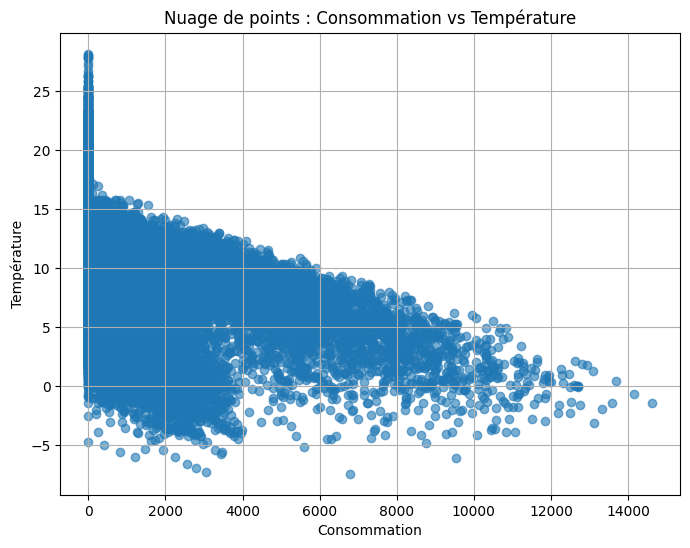

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(conso_ouvert_flat2["valeur"], Text_combined_ouvert_flat2["valeur"], alpha=0.6)
plt.xlabel("Consommation")
plt.ylabel("Température")
plt.title("Nuage de points : Consommation vs Température")
plt.grid(True)
plt.show()

In [40]:
print(Text_combined_ouvert_flat["valeur"].mean())

7.898482343049327
